In [22]:
%matplotlib inline

In [23]:
import pandas as pd
import numpy as np
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Dropbox/SimulationOutput/hierarchy1/stats.sqlite')

In [4]:
q = pd.read_sql_table('stats', conn)
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)
allc = q.unstack(-1)
allc.columns = allc.columns.levels[1]
allc.tail()

kind                                       C_1       C_2       C_3       C_4  \
treatment_id replicate_id generation                                           
3            20           59600       0.000529  0.003863  0.002885  0.412269   
                          59700       0.000795  0.001917  0.004304  0.418753   
                          59800       0.000091  0.001604  0.004193  0.418779   
                          59900       0.002064  0.000036  0.003135  0.420631   
                          60000       0.003161  0.000582  0.002258  0.420829   

kind                                       C_5       C_6       C_7       C_8  \
treatment_id replicate_id generation                                           
3            20           59600       0.006085  0.039153  1.936042  0.144654   
                          59700       0.006188  0.034953  1.926251  0.133622   
                          59800       0.003773  0.036747  1.909650  0.142927   
                          59900       0.001334  0.033253  1.910622  0.119711   
                          60000       0.000305  0.034111  1.904286  0.109380   

kind                                  C_MAX    C_MEAN    C_MXMN  F_MAX  \
treatment_id replicate_id generation                                     
3            20           59600           3  2.545480  1.936042      1   
                          59700           3  2.526783  1.926251      1   
                          59800           3  2.517765  1.909650      1   
                          59900           3  2.490787  1.910622      1   
                          60000           3  2.474910  1.904286      1   

kind                                    F_MEAN     F_VAR  N_PERC  
treatment_id replicate_id generation                              
3            20           59600       0.993821  0.001015     NaN  
                          59700       0.993525  0.001037     NaN  
                          59800       0.994016  0.000789     NaN  
                          59900       0.994513  0.000889     NaN  
                          60000       0.992179  0.001282       0

In [164]:
def get_treat_rep(t, r):
    return allc.groupby(level=[0,1]).get_group((t,r)).reset_index([0, 1]).drop('treatment_id', axis=1).drop('replicate_id', axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1212d9fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121754910>], dtype=object)

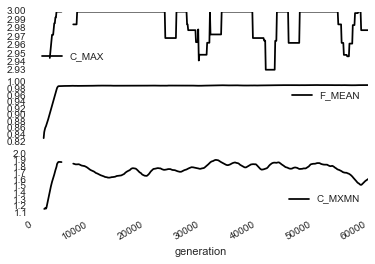

In [167]:
t1r1 = get_treat_rep(3, 16)
pd.rolling_mean(t1r1[['C_MAX', 'F_MEAN', 'C_MXMN']], 20).plot(subplots=True)

In [61]:
z = pd.read_sql_query('select generation, kind, value from stats where treatment_id = 2 and replicate_id = 5', conn, index_col=['generation', 'kind'])
z.tail()

value
generation kind            
60000      C_MEAN  2.972532
           C_MXMN  2.947299
           F_MAX   1.000000
           F_MEAN  0.995371
           F_VAR   0.000923

In [74]:
zz = z.unstack(-1)
zz.tail()

value                                                          \
kind             C_1       C_2       C_3       C_4       C_5       C_6 C_MAX   
generation                                                                     
59600       0.008597  2.975538  0.001142  0.000062  0.000253  0.000006     3   
59700       0.006562  2.979249  0.003151  0.000065  0.002560  0.000722     3   
59800       0.006074  2.976447  0.001253  0.000092  0.000761  0.000026     3   
59900       0.010209  2.960912  0.005512  0.000015  0.006122  0.000382     3   
60000       0.011296  2.947299  0.005999  0.000596  0.006757  0.000584     3   

                                                          
kind          C_MEAN    C_MXMN F_MAX    F_MEAN     F_VAR  
generation                                                
59600       2.985598  2.975538     1  0.994416  0.001098  
59700       2.992309  2.979249     1  0.995263  0.000885  
59800       2.984653  2.976447     1  0.995042  0.000942  
59900       2.983152  2.960912     1  0.994888  0.000867  
60000       2.972532  2.947299     1  0.995371  0.000923

In [75]:
zz.columns = zz.columns.levels[1]

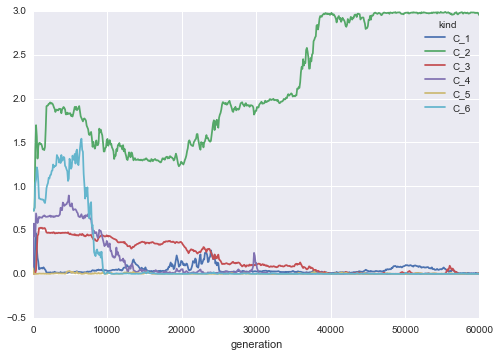

In [80]:
zz.plot(y=['C_%d' % (i+1) for i in range(6)])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d68d090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d866e50>], dtype=object)

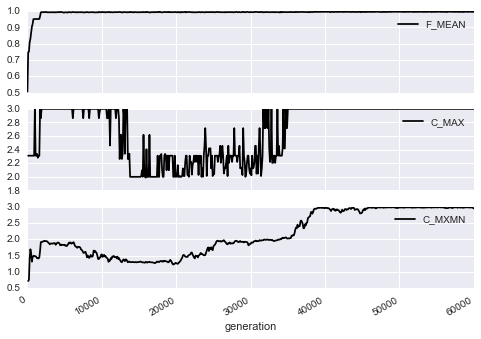

In [77]:
zz.plot(y=["F_MEAN", "C_MAX", "C_MXMN"], subplots=True)

In [78]:
finals = pd.read_sql_query('select treatment_id, value from stats where generation = 10000 and kind = "F_MEAN"', conn)

In [79]:
finals.tail()

,treatment_id,value
55,3,0.990740
56,3,0.992758
57,3,0.994079
58,3,0.992493
59,3,0.991354


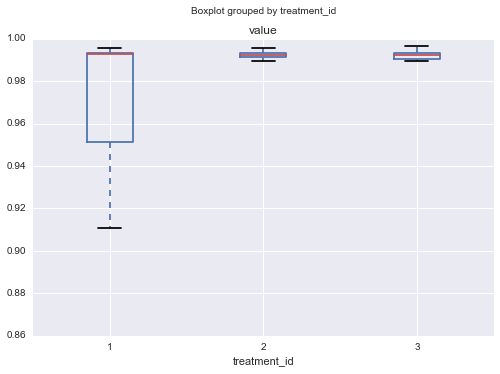

In [71]:
finals.boxplot(column='value',by='treatment_id')

In [78]:
nay = pd.read_sql_query('select treatment_id, replicate_id, kind, value from stats where generation = 60000 and kind in ("N_PERC", "C_MXMN")', conn, index_col=['treatment_id', 'replicate_id', 'kind'])
nay = nay.unstack(-1)
nay.columns = nay.columns.levels[1]
nay.reset_index(inplace=True)
nay.tail()

kind,treatment_id,replicate_id,C_MXMN,N_PERC
55,3,16,1.621172,0.29530
56,3,17,2.825073,0.35379
57,3,18,0.673801,0.32103
58,3,19,2.849068,0.34715
59,3,20,1.904286,0.33280


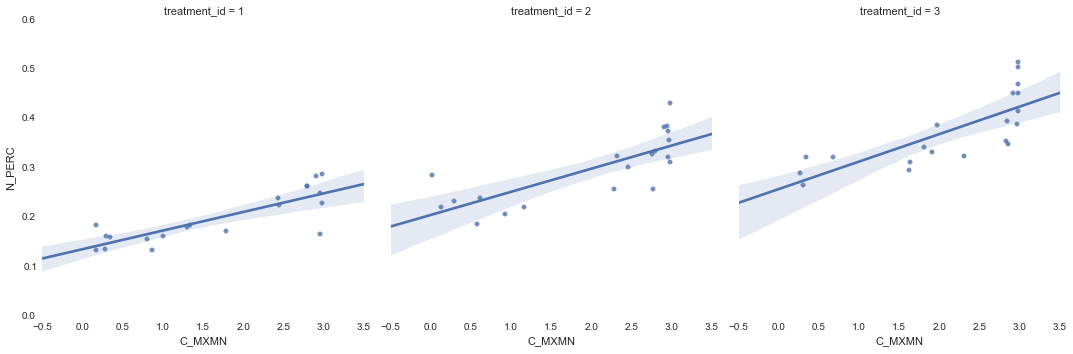

In [79]:
sb.lmplot(x="C_MXMN", y="N_PERC", data=nay, col='treatment_id')

In [80]:
nay.corr()

kind,treatment_id,replicate_id,C_MXMN,N_PERC
kind,,,,
treatment_id,1.000000,0.000000,0.160557,0.748164
replicate_id,0.000000,1.000000,-0.106139,-0.102018
C_MXMN,0.160557,-0.106139,1.000000,0.627902
N_PERC,0.748164,-0.102018,0.627902,1.000000


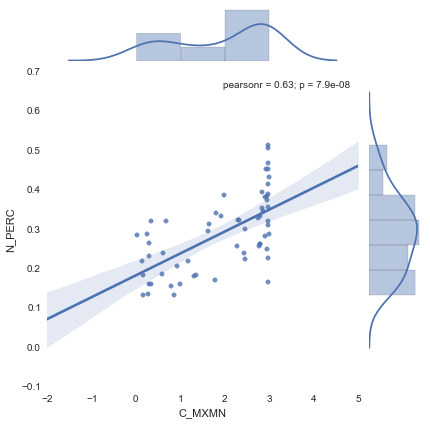

In [82]:
sb.jointplot(x="C_MXMN", y="N_PERC", data=nay, kind='reg')

In [75]:
from scipy.stats import kendalltau

In [83]:
print kendalltau(nay['N_PERC'], nay['C_MXMN'])

(0.48248587570621476, 5.1298368123728986e-08)
